In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette("deep")

from constants import BLOG_EXPORT_PATH
TARGET_DIR = f"{BLOG_EXPORT_PATH}/07-2025-equidistant-parabolic-points/figs"
plt.rcParams['text.usetex'] = True

In [2]:
v_x = 200
u_y = (5/3) * 150
g = (6/5) * u_y

base_y = 10
total_time = (2 * u_y) / g
print(total_time)

def s_x(t):
    return v_x * t

def s_y(x=None, t=None):

    if type(x) == np.array and (x is not None and len(x) > 0 and t is not None and len(t) > 0):
        print("Error: provide only one of x or t")
        return None
    if x is not None:
        t = x / v_x
        return (u_y * t - 0.5 * g * t**2) + base_y
    if t is not None:
        return (u_y * t - 0.5 * g * t**2) + base_y

1.6666666666666667


In [3]:
x_dist = total_time * v_x

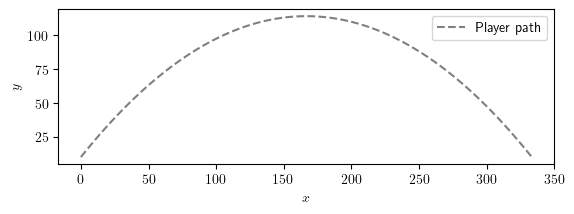

In [4]:
parabolic_t = np.linspace(0, total_time, 100)
parabolic_x = s_x(parabolic_t)
parabolic_y = s_y(t=parabolic_t)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.gca().set_aspect('equal', adjustable='box')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.savefig(f'{TARGET_DIR}/parabolic-trajectory.png', dpi=300, bbox_inches='tight')

In [5]:
n_coins = 12
mid_x = x_dist / 2
height = s_y(x=np.array([mid_x]))
print(f"{height=} {mid_x=}")
angles = [np.pi * i / n_coins for i in range(0, n_coins+1)]
circ_x = mid_x + height * np.cos(angles)
circ_y = base_y + height * np.sin(angles)

height=array([114.16666667]) mid_x=166.66666666666669


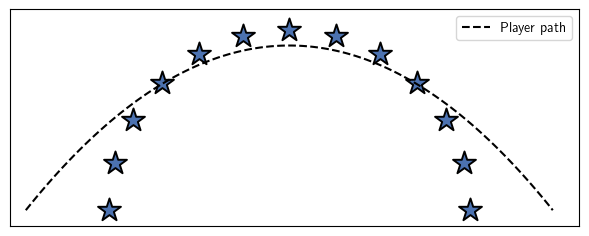

In [6]:
sns.scatterplot(x=circ_x, y=circ_y, marker='*', edgecolor='black', s=300)
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='black', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.savefig(f'{TARGET_DIR}/circular-coins-nolabels.png', dpi=300, bbox_inches='tight')

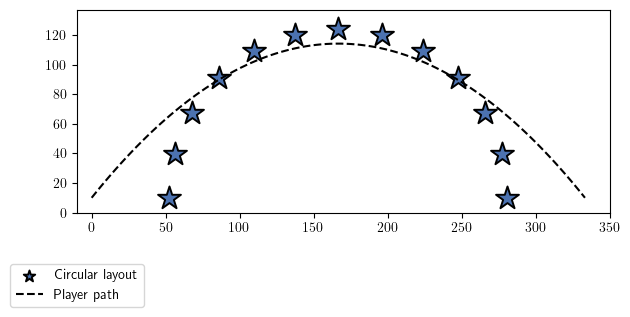

In [7]:

sns.scatterplot(x=circ_x, y=circ_y, marker='*', edgecolor='black', s=300, label='Circular layout')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='black', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/circular-coins.png', dpi=300, bbox_inches='tight')

### Equally spaced $x$

$$s_y = u_y t - 0.5 gt^2$$
Since $v_x$ is constant, at time $t$, $x = t v_x$. Rearranging allows us to express $t$ as $\frac{x}{v_x}$. We can therefore express the $y$-displacement in terms of the current $x$-displacement:
$$
s_y = u_y \frac{x}{v_x} - 0.5 g \left(\frac{x}{v_x} \right)^2
$$

In [8]:
const_x_x = np.linspace(0, x_dist, n_coins)
print(const_x_x[1] - const_x_x[0])
const_x_y = s_y(x=const_x_x)

30.303030303030308


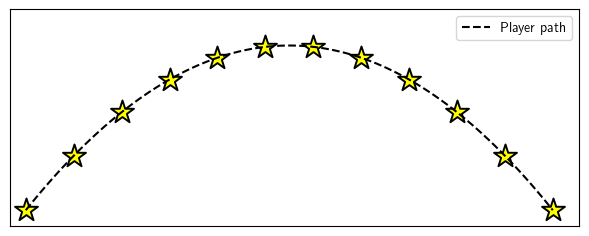

In [9]:
sns.scatterplot(x=const_x_x, y=const_x_y, marker='*', edgecolor='black', s=300, color='yellow')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='black', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.savefig(f'{TARGET_DIR}/constant-x-parabolic-coins-no-labels.png', dpi=300, bbox_inches='tight')

30.303030303030308


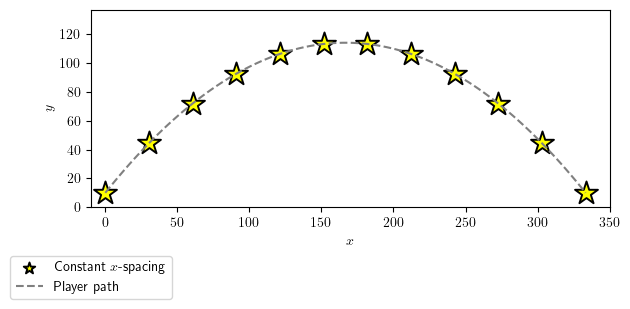

In [10]:
const_x_x = np.linspace(0, x_dist, n_coins)
print(const_x_x[1] - const_x_x[0])
const_x_y = s_y(x=const_x_x)
sns.scatterplot(x=const_x_x, y=const_x_y, marker='*', edgecolor='black', s=300, label=r'Constant $x$-spacing', color='yellow')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/constant-x-parabolic-coins.png', dpi=300, bbox_inches='tight')

### Equally spaced time intervals

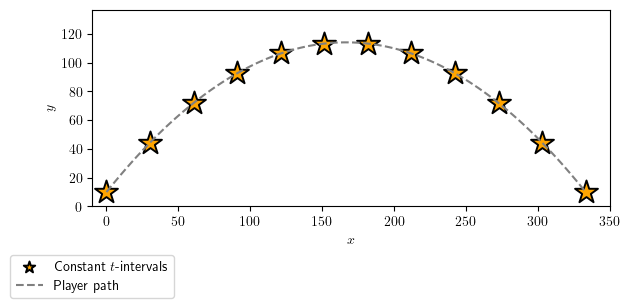

In [11]:
time_vals = np.linspace(0, total_time, n_coins)
const_t_x = s_x(time_vals)
const_t_y = s_y(t=time_vals)
sns.scatterplot(x=const_t_x, y=const_t_y, marker='*', edgecolor='black', s=300, label=r'Constant $t$-intervals', color='orange')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/constant-t-parabolic-coins.png', dpi=300, bbox_inches='tight')

(0.0, 137.0)

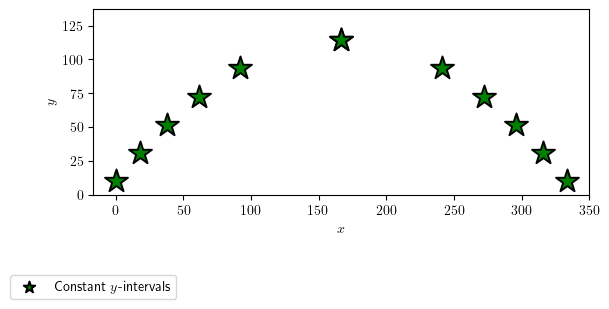

In [12]:
def t_y(y):
    t_1 = (u_y + np.sqrt(u_y ** 2  - 2 * g * (y - base_y))) / g
    t_2 = (u_y - np.sqrt(u_y ** 2  - 2 * g * (y - base_y))) / g
    return np.concatenate((t_1, t_2))

y_vals = np.linspace(base_y, height, n_coins//2).flatten()
t_vals = t_y(y_vals).flatten()
y_vals = s_y(t=t_vals).flatten()
x_vals = s_x(t_vals).flatten()

sns.scatterplot(x=x_vals, y=y_vals, marker='*', edgecolor='black', s=300, label=r'Constant $y$-intervals', color='green')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.6), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(0, height * 1.2)

In [13]:
t_vals

array([1.66666667, 1.57868933, 1.47883056, 1.36037961, 1.20601133,
       0.83333333, 0.        , 0.08797734, 0.18783611, 0.30628706,
       0.46065534, 0.83333333])

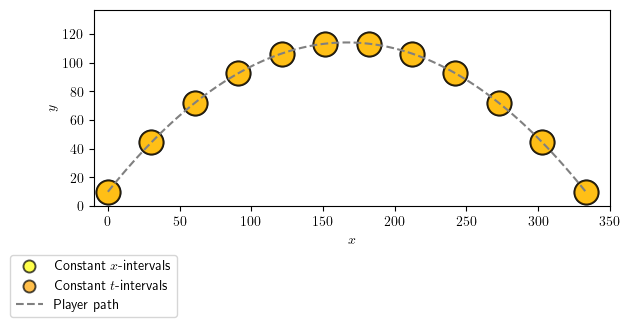

In [14]:
sns.scatterplot(x=const_x_x, y=const_x_y, s=300, label=r'Constant $x$-intervals', alpha=0.7, edgecolor='black', color='yellow')
sns.scatterplot(x=const_t_x, y=const_t_y, s=300, label=r'Constant $t$-intervals', alpha=0.7, edgecolor='black', color='orange')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.6), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/const-x-comparison-const-t.png', dpi=300, bbox_inches='tight')

## The exact calculation

$\,ds = \sqrt{\,dx^2 + \,dy^2} = \sqrt{1 + \frac{\,dy}{\,dx}^2} \,dx$. We want to generate points $(x_i, y_i)$ such that the arclength between these two points is exactly constant, so we want to solve $S = \int \sqrt{1 + \frac{\,dy}{\,dx}^2} \,dx$ for $x$. 

Luckily, we know that $y = u_y \frac{x}{v_x} - 0.5 g \left(\frac{x}{v_x} \right)^2$, so we know that $\frac{\,dy}{\,dx} = \frac{u_y}{v_x} - \frac{g}{v_x^2}x$. We can plug this back into the integral:
$$
S = \int \sqrt{1 + \left(\frac{u_y}{v_x} - \frac{g}{v_x^2}x\right)^2} \,dx
$$

That looks like a tricky integral. Let's programmatically evaluate it with `sympy`:

In [ ]:
from IPython.display import display
import sympy
xs, u_ys, v_xs, gs = sympy.symbols('x u_y v_x g', real=True)
expr = sympy.sqrt(1 + (u_ys / v_xs - (gs / v_xs**2) * xs)**2)
S = sympy.integrate(expr, xs)
display(S)

In [ ]:
sympy.print_latex(S)

\begin{cases} \frac{v_{x}^{2} \left(- \frac{u_{y}^{2}}{v_{x}^{2}} - \frac{1}{2} + \frac{u_{y}^{2} + v_{x}^{2}}{v_{x}^{2}}\right) \log{\left(\frac{2 g^{2} x}{v_{x}^{4}} - \frac{2 g u_{y}}{v_{x}^{3}} + \frac{2 \sqrt{\frac{g^{2} x^{2}}{v_{x}^{4}} - \frac{2 g u_{y} x}{v_{x}^{3}} + \frac{u_{y}^{2}}{v_{x}^{2}} + 1} \left|{g}\right|}{v_{x}^{2}} \right)}}{\left|{g}\right|} + \left(\frac{x}{2} - \frac{u_{y} v_{x}}{2 g}\right) \sqrt{\frac{g^{2} x^{2}}{v_{x}^{4}} - \frac{2 g u_{y} x}{v_{x}^{3}} + \frac{u_{y}^{2}}{v_{x}^{2}} + 1} & \text{for}\: \frac{g^{2}}{v_{x}^{4}} \neq 0 \\- \frac{v_{x}^{3} \left(- \frac{2 g u_{y} x}{v_{x}^{3}} + \frac{u_{y}^{2}}{v_{x}^{2}} + 1\right)^{\frac{3}{2}}}{3 g u_{y}} & \text{for}\: \frac{g u_{y}}{v_{x}^{3}} \neq 0 \\x \sqrt{\frac{u_{y}^{2}}{v_{x}^{2}} + 1} & \text{otherwise} \end{cases}


We want to solve for $x$--but it's nested across the square root inside the logarithm in the first term, the coefficient of the second term, and the square root in the second term. It seems intractable to rearrange the expression to get a clean equation for $x$.

We're left with two choices:
1. Use a numerical solver to approximate a solution for $x$
2. Go back to square one and make some principled approximations to avoid this issue entirely

## The approximation

Our original goal was for the arclength $\Delta s$ between points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ to be constant, and we previously tried to calculate the exact $x$-displacement $\Delta x$ from $x_i$ that results in an $x_{i+1}$ whose corresponding point on the parabola is $\Delta s$ away.

If we approximate $\,ds \approxeq \Delta s$ and $\,dx \approxeq \Delta x$, it becomes trivially simple to solve for $\Delta x$!

$$
\Delta S = \sqrt{1 + \left(\frac{u_y}{v_x} - \frac{g}{v_x^2}x\right)^2} \Delta x\\
\implies \Delta x = \frac{\Delta S}{\sqrt{1 + \left(\frac{u_y}{v_x} - \frac{g}{v_x^2}x\right)^2}}
$$

In [ ]:
import numpy as np
def approximate_x_displacement(x, delta_s, v_x=v_x, u_y=u_y, g=g):
    dy_dx = u_y / v_x - (g / v_x**2) * x
    
    return delta_s / np.sqrt(1 + dy_dx**2)

x = 0
delta_s = 35
x_vals_new = []
y_vals_new = []
while x < x_dist and (len(y_vals_new) == 0 or y_vals_new[-1] >= 0):
    x_vals_new.append(x)
    y_vals_new.append(s_y(x=x))
    x += approximate_x_displacement(x, delta_s)
x_vals_new, y_vals_new

([0,
  np.float64(21.86432666440485),
  np.float64(45.57239506787579),
  np.float64(71.48169304327911),
  np.float64(99.96773140071093),
  np.float64(131.26965229165486),
  np.float64(165.09786853639883),
  np.float64(200.09544611545783),
  np.float64(234.04470769584955),
  np.float64(265.28270970101346),
  np.float64(293.4222839636416),
  np.float64(318.7888123166014)],
 [10.0,
  np.float64(35.53772540367679),
  np.float64(59.17733186401018),
  np.float64(80.19099465284798),
  np.float64(97.4838617956211),
  np.float64(109.4681093166737),
  np.float64(114.1574374382659),
  np.float64(109.97610430878197),
  np.float64(97.14241511817823),
  np.float64(77.69745187759617),
  np.float64(53.915467230402385),
  np.float64(27.387364677391815)])

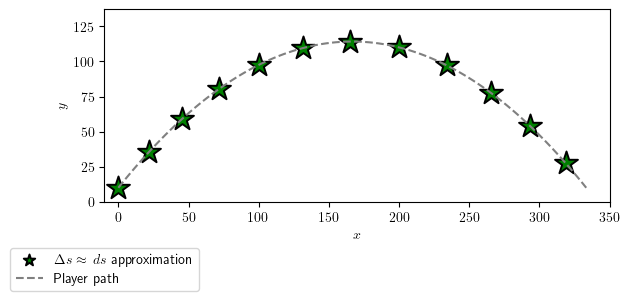

In [ ]:
sns.scatterplot(x=x_vals_new, y=y_vals_new, marker='*', edgecolor='black', s=300, label=r'$\Delta s \approx \,ds$ approximation', color='green')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.5), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(0, height * 1.2)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/approximation.png', dpi=300, bbox_inches='tight')

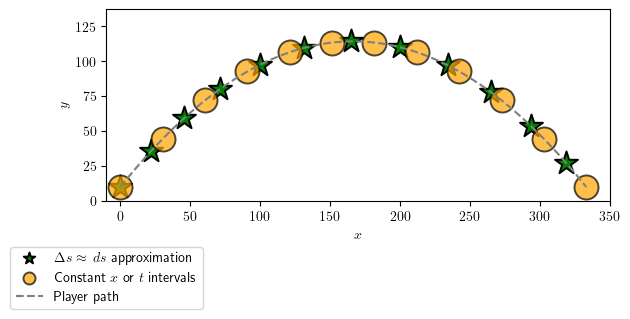

In [ ]:
sns.scatterplot(x=x_vals_new, y=y_vals_new, marker='*', edgecolor='black', s=300, label=r'$\Delta s \approx \,ds$ approximation', color='green')
sns.scatterplot(x=const_x_x, y=const_x_y, s=300, label=r'Constant $x$ or $t$ intervals', alpha=0.7, edgecolor='black', color='orange')
sns.lineplot(x=parabolic_x, y=parabolic_y, label='Player path', color='gray', linestyle='--')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.6), markerscale=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.ylim(0, height * 1.2)
plt.xlim(-10, x_dist*1.05)
plt.tight_layout()
plt.savefig(f'{TARGET_DIR}/approximation-comparison-const-x-.png', dpi=300, bbox_inches='tight')